## forest vs. desert
This model is a prototype of a prototype.  
eventually I want to do much more with ecosystem classification but I need to start somewhere  
I really need ecologists to help me with this project!!!!!!  

### Import all the stuff for models

In [11]:
import os                                
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # silence all the tensorflow warnings
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

### import images from the directories

In [12]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import matplotlib.pyplot as plt
base_dir = "./ecosystems/"
forest_dir = os.path.join(base_dir, 'forest/')
desert_dir = os.path.join(base_dir, 'desert/')

### train on just forest and desert, use validation set.
I am getting impatiant, I just want to see if it can even get forest vs. desert with about 700 pics of each

In [15]:
dataset = image_dataset_from_directory(base_dir, labels='inferred',image_size = (300,300),batch_size=32)
iterator = iter(dataset)
batch_size = 64
num_batches = 21
x_train = []
y_train = []
x_test = []
y_test = []
for batch in range(num_batches):
    (x_batch, y_batch) = next(iterator)
    x_train.extend(x_batch)
    y_train.extend(y_batch)
# 20% of data should be used for testing
test_size = int(len(x_train) * .2)
x_test = x_train[:test_size]
y_test = y_train[:test_size]
x_train = x_train[test_size:]
y_train = y_train[test_size:]


Found 3401 files belonging to 3 classes.


In [16]:
from tensorflow.keras import layers
from tensorflow.keras.losses import binary_crossentropy
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import numpy as np

# define model
model = keras.models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(300, 300, 3)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(300, 300, 3)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
# compile model
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
# create validation sets
val_size = int(len(x_train)*.2)
x_val = np.array(x_train[:val_size])
x_train = np.array(x_train[val_size:])
y_val = np.array(y_train[:val_size])
y_train = np.array(y_train[val_size:])


# fit model
history = model.fit(x_train,y_train,epochs=3, batch_size=32, 
                    validation_data=(x_val,y_val) )

Epoch 1/3
14/14 [==============================] - 10s 658ms/step - loss: 492.9799 - accuracy: 0.6520 - val_loss: -396.8561 - val_accuracy: 0.6916
Epoch 2/3
14/14 [==============================] - 9s 645ms/step - loss: -184.5945 - accuracy: 0.7471 - val_loss: -1205.1273 - val_accuracy: 0.6916
Epoch 3/3
14/14 [==============================] - 9s 641ms/step - loss: -206.8107 - accuracy: 0.7935 - val_loss: -1390.3326 - val_accuracy: 0.7570


# plot loss, validation loss, accuracy, and validation accuracy


/tmp/ipykernel_4868/4068500157.py:12: UserWarning: Legend does not support handles for list instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend([loss, accuracy, val_loss, val_acc],['loss', 'accuracy', 'val_loss', 'val_accuracy'])


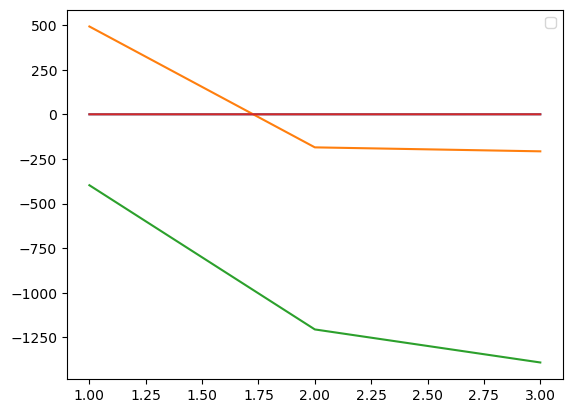

In [26]:
import matplotlib.pyplot as plt
import numpy as np
loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
x = list(range(1,4))
plt.plot(x, accuracy)
plt.plot(x, loss)
plt.plot(x, val_loss)
plt.plot(x, val_acc)
plt.legend([loss, accuracy, val_loss, val_acc],['loss', 'accuracy', 'val_loss', 'val_accuracy'])
plt.show()

In [17]:
pred = model.evaluate(np.array(x_test),np.array(y_test))

5/5 [==============================] - 0s 86ms/step - loss: -1038.0514 - accuracy: 0.8209


### final remarks

Obviously this could be tweeked and improved quite a bit.  I should be using k-means crossvalidation to determine the best number of epochs and batch size and I should remove some of the low quality images of canadian taiga.
All in all this prototype seems to be successful in that it can predict with >90% accuracy.  
Obviously I will start making models that can predict less obvious and hopefully more helpful things than this.